# Praca domowa 1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas-profiling as pp

In [3]:
forest_fires_df = pd.read_csv("forest_fires_dataset.csv")
forest_fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [3]:
forest_fires_df.info() # niema braków danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [4]:
forest_fires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


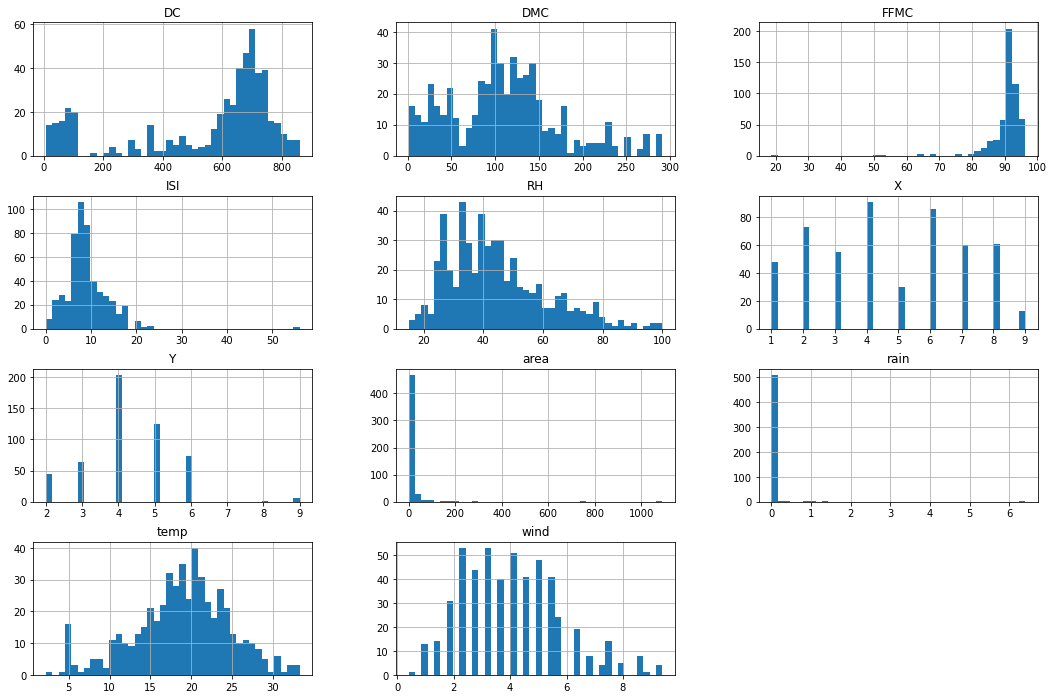

In [43]:
forest_fires_df.hist(figsize=(18, 12), bins=40)
plt.show()
# rozkład normalny przypominają tu ISI i temp
# rozkłąd skośny do 0 ma np. area, skośny do 100 FFMC
# Podobnie jak na ostatnim laboratorium, RH nie ma outlierów, tylko dłuższy ogon
# DC wygląda trochę tak, jakby był to rozkład bimodalny, ale utworzyć z niego rozkład dyskretny raczej się nie da

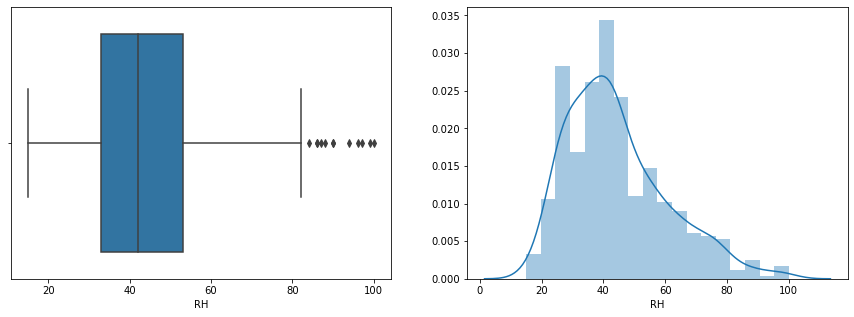

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(forest_fires_df["RH"],  orient="h" , ax=axes[0])
sns.distplot(forest_fires_df["RH"], ax=axes[1])

plt.show()

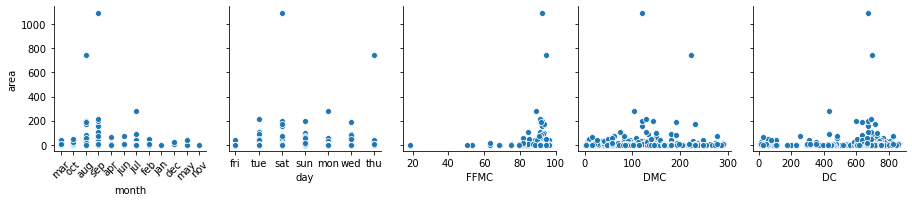

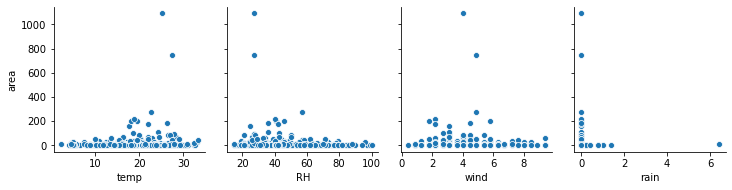

In [37]:
grid = sns.pairplot(forest_fires_df, y_vars="area", x_vars=forest_fires_df.columns.values[2:7])
grid.axes.flat[0].tick_params(axis='x', labelrotation=45)

sns.pairplot(forest_fires_df, y_vars="area", x_vars=forest_fires_df.columns.values[8:12])

plt.show()
# Dość oczekiwany był fakt, że większość pożarów odbyła się przy braku deszczu
# To samo dotyczy dużej ilości pożarów pzy wysokim FFMC(poziom suchości drobnych paliw, tzn liści, śmieci itd)
# Podobnie też z tym, iż większość pożarów(zwłaszcza tych większych) wydarzyła się przy niskim RH(wilgotność względna)
# Ciekawe, że większe pożary wydarzały się przy średnich(nie maksymalnych) wartościach prędkości wiatru
# Poza tym jakichkolwiek interesujących zależności niema

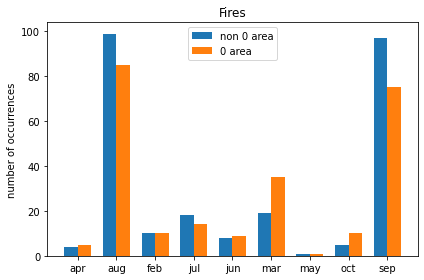

In [40]:
non0_area_df_by_month = forest_fires_df[forest_fires_df.area != 0].groupby("month").size().reset_index(name='non0_area')
month_fires = (forest_fires_df[forest_fires_df.area == 0].groupby("month").size().reset_index(name='0_area')
               .merge(non0_area_df_by_month, on="month"))
# month_fires
labels = month_fires["month"].to_list()
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, month_fires["non0_area"], width, label='non 0 area')
rects2 = ax.bar(x + width/2, month_fires["0_area"], width, label='0 area')

# ax.set_ylabel("Fires by months")
ax.set_title("Fires")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylabel("number of occurrences")
fig.tight_layout()

# def month_to_season(month):
#     if month in ["oct", "nov", "sep"]:
#         return "autumn"
#     elif month in ["mar", "apr", "may"]:
#         return "spring"
#     elif month in ["jan", "feb", "dec"]:
#         return "winter"
#     elif month in ["jun", "jul", "aug"]:
#         return "summer"
#     return None

# forest_fires_df["season"] = forest_fires_df.month.apply(month_to_season)
# season_fires_df = forest_fires_df[forest_fires_df.area != 0].groupby("season").size().reset_index(name='counts')
# season_fires_df
# plt.bar(season_fires_df["season"], season_fires_df["counts"])
# plt.title("Fires in seasons")
# plt.show()

# ewentualnie warto podzielić pożary na "pożary w sierpniu i wrześniu" i "inne",
# gdyż w sierpniu i wrześniu więcej było pożarów o niezerowym polu(w stosunku do ogólnej ich liczby) 

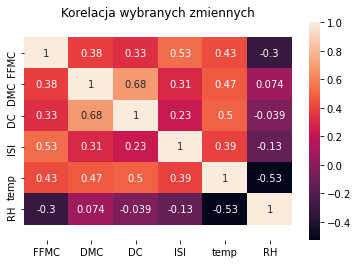

In [11]:
fores_fires_corr = forest_fires_df.drop(["X", "Y", "wind", "rain", "area"], axis=1)
corr=fores_fires_corr.corr()
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja wybranych zmiennych')
plt.show()
# mocno skorelowanych cech(abs(\rho)>0.7) raczej niema
# skorelowane są DC i DMC, co wynikać może z tego, że opisują one podobne rzeczy(suchość ziemi na różnych poziomach)
# podobnie w pozostałych przypadkach, gdzie korelacja jest w okolicy 0.5, wynika ona z tego, że współczynniki powstają
# na podstawie tych samych pomiarów(wilgotność powietrza, temparatura, suchość ziemi itd.) 

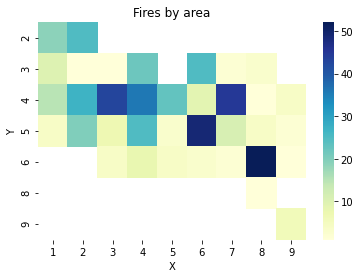

In [20]:
fires_by_areas = (forest_fires_df.groupby(["X", "Y"]).size().reset_index(name='fires').sort_values(by="fires", ascending=False)
.reset_index(drop=True)).pivot(index="Y", columns="X", values="fires")

sns.heatmap(fires_by_areas, cmap="YlGnBu")
plt.title("Fires by area")
plt.show()

# okazuje się, że są miejsca, gdzie pożary występują częściej niż w pozostałych(większość z nich jest obok siebie)

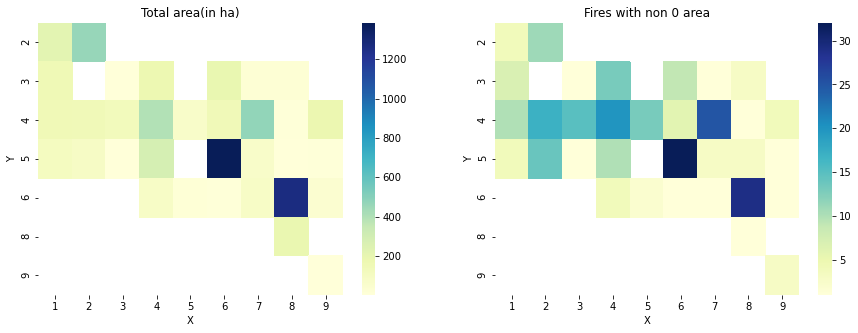

In [30]:
non0_area_df = forest_fires_df[forest_fires_df.area != 0].groupby(["X", "Y"]).size().reset_index(name="non0_area_count")

area_stat_df = (forest_fires_df.groupby(["X", "Y"]).apply(lambda x: x["area"].sum()).reset_index(name="total_area")
 .sort_values(by="total_area", ascending=False)).merge(non0_area_df, on=["X", "Y"])

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.heatmap(area_stat_df.drop("non0_area_count", axis=1).pivot(index="Y", columns="X", values="total_area"), cmap="YlGnBu",
           ax = axes[0])
axes[0].set_title("Total area(in ha)")

sns.heatmap(area_stat_df.drop("total_area", axis=1).pivot(index="Y", columns="X", values="non0_area_count"), cmap="YlGnBu",
           ax = axes[1])

axes[1].set_title("Fires with non 0 area")

plt.show()

# w tychże miejscach większość pożarów ma niezerowe pole,
# czyli zamiast zmiennych X, Y możnaby zrobić jedną dyskretną, pokazującą, czy należy miejsce rozpoczęcia pożaru
# do wybranych kwadratów(gdzie zaczyna się dużo pożarów o niezerowym polu) czy nie

## pandas_profiling

In [ ]:
data = pd.read_csv("forest_fires_dataset.csv")

profile = pp.ProfileReport(data)
profile.to_file("pandas_profiling_analysis.html")

`Pandas_profiling`, mimo że pozwala na szybkie przeanalizowanie ciekawiących nas danych, jest jednak nieco ograniczonym narzędziem: 
- wymaga bowiem podania już oczyszczonych danych(raczej nie zrobi tego samodzielnie), 
- długo działa na dużym zbiorze danych(zawsze można przeanalizować wybraną próbkę, ale to jednak nie to samo, co przejrzenie wszystkich danych)
- potrafi generować tylko wybrane typy wykresów.